# Atividade 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

In [81]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [82]:
# Carregando os dados do arquivo 'demo01.csv' em um DataFrame chamado 'df'
df = pd.read_csv('demo01.csv')

# Exibindo as primeiras linhas do DataFrame
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [83]:
# Imprimindo as variáveis do DataFrame
print("Variáveis\n", df.columns)

Variáveis
 Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'possui_celular', 'possui_fone_comercial',
       'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau'],
      dtype='object')


In [84]:
# Imprimindo os tipos de dados por variável no DataFrame
print("Tipos de dados por variável\n", df.dtypes)

Tipos de dados por variável
 sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object


In [85]:
# Imprimindo a quantidade de valores ausentes por variável no DataFrame
print("Quantidade de missings\n", df.isnull().sum())

Quantidade de missings
 sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64


In [86]:
# Imprimindo a distribuição da variável resposta 'mau' no DataFrame
print("Distribuição da variável resposta", df['mau'].value_counts())

Distribuição da variável resposta mau
False    16260
True       390
Name: count, dtype: int64


#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [87]:
# Criando um DataFrame de metadados com informações sobre as variáveis e seus tipos de dados
metadata = pd.DataFrame({'Variável': df.columns, 'Tipo Dado': df.dtypes})

# Imprimindo os metadados
print("Metadados:")
print(metadata)

# Adicionando a quantidade de categorias por variável ao DataFrame de metadados
metadata['qtd_categorias'] = df.nunique()

# Imprimindo a quantidade de categorias por variável
print("\nQuantidade de Categorias por Variável:")
print(metadata[['Variável', 'qtd_categorias']])

# Criando um DataFrame Dummy para variáveis categóricas
df_dummies = pd.get_dummies(df.select_dtypes(exclude=['number', 'bool']))

# Imprimindo o DataFrame Dummy
print("\nDataFrame Dummy:")
print(df_dummies)

Metadados:
                                    Variável Tipo Dado
sexo                                    sexo    object
posse_de_veiculo            posse_de_veiculo    object
posse_de_imovel              posse_de_imovel    object
qtd_filhos                        qtd_filhos     int64
tipo_renda                        tipo_renda    object
educacao                            educacao    object
estado_civil                    estado_civil    object
tipo_residencia              tipo_residencia    object
idade                                  idade   float64
tempo_emprego                  tempo_emprego   float64
possui_celular                possui_celular     int64
possui_fone_comercial  possui_fone_comercial     int64
possui_fone                      possui_fone     int64
possui_email                    possui_email     int64
qt_pessoas_residencia  qt_pessoas_residencia   float64
mau                                      mau      bool

Quantidade de Categorias por Variável:
              

#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [88]:
# Imprimindo variáveis dummy
print("Variáveis Dummy:")
qualitative_columns = df.select_dtypes(include=['object']).columns
df_dummies = pd.get_dummies(df[qualitative_columns], drop_first=True)
print(df_dummies)

Variáveis Dummy:
       sexo_M  posse_de_veiculo_Y  posse_de_imovel_Y  tipo_renda_Pensioner  \
0        True                True               True                 False   
1       False               False               True                 False   
2       False               False               True                 False   
3        True                True               True                 False   
4       False                True              False                 False   
...       ...                 ...                ...                   ...   
16645   False               False               True                 False   
16646   False               False               True                 False   
16647    True                True               True                 False   
16648    True                True               True                 False   
16649   False               False               True                  True   

       tipo_renda_State servant  tipo_renda_St

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [89]:
# Criando tabela cruzada entre 'possui_email' e 'posse_de_veiculo' com margens e contagem total de 'mau' igual a 1
cross_table = pd.crosstab(df['possui_email'], df['posse_de_veiculo'], margins=True, margins_name='Total')

# Adicionando a contagem total de 'mau' igual a 1 na tabela cruzada
cross_table['Total_mau_1'] = df[df['mau'] == 1].groupby(['possui_email', 'posse_de_veiculo']).size()

# Imprimindo a tabela cruzada
print("Tabela cruzada 'possui_email' e 'posse_de_veiculo'\n")
print(cross_table)

Tabela cruzada 'possui_email' e 'posse_de_veiculo'

posse_de_veiculo      N     Y  Total  Total_mau_1
possui_email                                     
0                  9341  5829  15170          NaN
1                   837   643   1480          NaN
Total             10178  6472  16650          NaN


Variável 'posse_de_veiculo' parece ser mais poderosa, pois:

- Aparece mais vezes em 'posse_de_veiculo';
- Existe uma discrepância maior entre 'N' e 'Y' em 'posse_de_veiculo' indicando que a posse de veículo pode ser mais influente na probabilidade de 'mau'

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [90]:
# Salvando o DataFrame em um arquivo CSV sem incluir índices
df.to_csv('demo01_mod.csv', index=False)

# Atividade 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [91]:
# Carregando o arquivo CSV 'demo01_mod.csv' em um DataFrame chamado df
df = pd.read_csv('demo01_mod.csv')

# Exibindo as primeiras linhas do DataFrame
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [92]:
# Criando conjuntos de treinamento e validação para recursos (X) e rótulos (y)
X = df.drop('mau', axis=1)
y = df['mau']

# Dividindo os dados em conjuntos de treinamento e validação usando train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Exibindo as dimensões dos conjuntos de treinamento e validação
print("Treinamento - X:", X_train.shape, " y:", y_train.shape)
print("Validação - X:", X_valid.shape, " y:", y_valid.shape)

Treinamento - X: (11655, 15)  y: (11655,)
Validação - X: (4995, 15)  y: (4995,)


In [93]:
# 2.1 - Criando variáveis fictícias para as colunas não numéricas ou booleanas do DataFrame
df_dummies = pd.get_dummies(df.select_dtypes(exclude=['number', 'bool']))
print(df_dummies)

       sexo_F  sexo_M  posse_de_veiculo_N  posse_de_veiculo_Y  \
0       False    True               False                True   
1        True   False                True               False   
2        True   False                True               False   
3       False    True               False                True   
4        True   False               False                True   
...       ...     ...                 ...                 ...   
16645    True   False                True               False   
16646    True   False                True               False   
16647   False    True               False                True   
16648   False    True               False                True   
16649    True   False                True               False   

       posse_de_imovel_N  posse_de_imovel_Y  tipo_renda_Commercial associate  \
0                  False               True                            False   
1                  False               True                

In [94]:
# 2.2 - Verificando se a coluna alvo 'mau' está presente em df_dummies
y_column = 'mau'
if y_column in df_dummies.columns:
    # Separando recursos (X) e rótulos (y) com base na presença da coluna alvo
    X = df_dummies.drop(y_column, axis=1)
    y = df_dummies[y_column]
else:
    # Se 'mau' não estiver presente, X é df_dummies e y é a coluna 'mau' de df
    X = df_dummies
    y = df[y_column]

In [95]:
# 2.3 - Dividindo os dados em conjuntos de treinamento e validação usando train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=4)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [96]:
# 2.4 - Criando um modelo de árvore de decisão com o DecisionTreeClassifier e definindo a semente random_state como 4
tree_model = DecisionTreeClassifier(random_state=4)

In [97]:
# 2.5 - Treinando o modelo de árvore de decisão com os conjuntos de treinamento X_train e y_train
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=4)

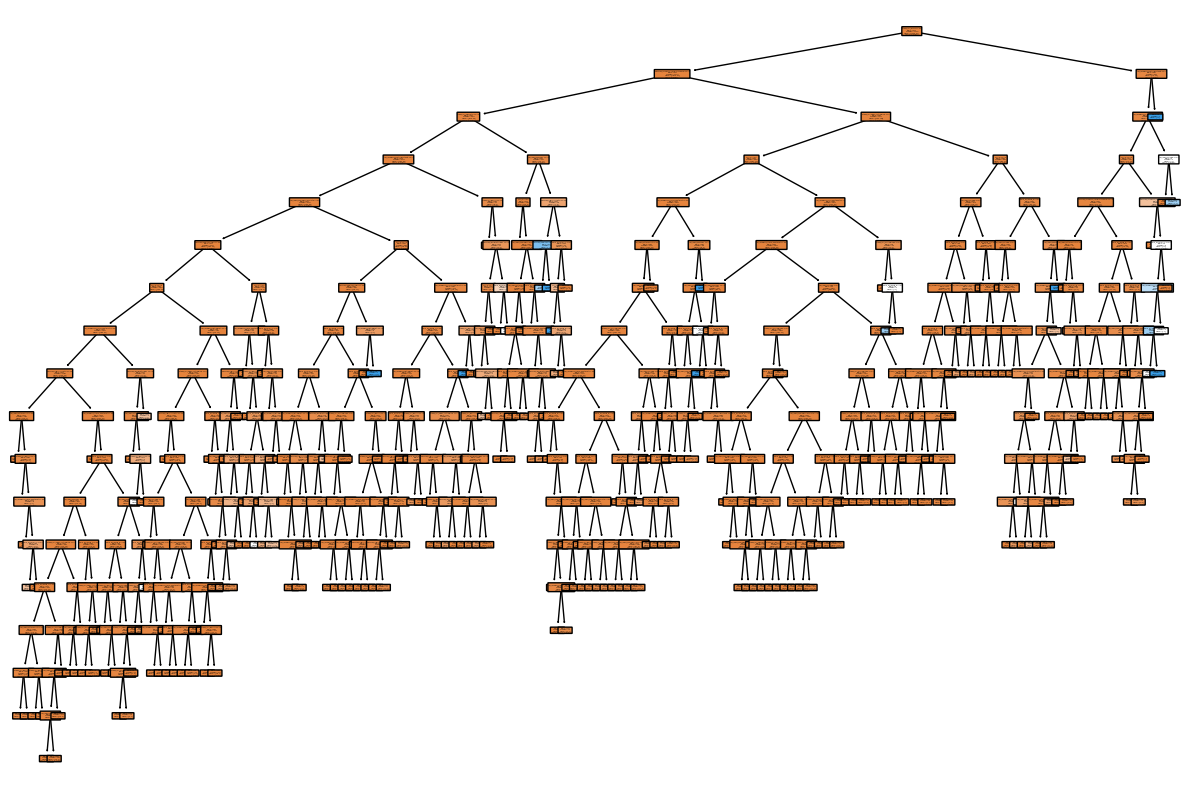

In [98]:
# 2.6 - Visualizando a árvore de decisão treinada
plt.figure(figsize=(15, 10))
plot_tree(tree_model, filled=True, feature_names=list(X.columns), class_names=['Aprovados', 'Reprovados'], rounded=True)
plt.show()

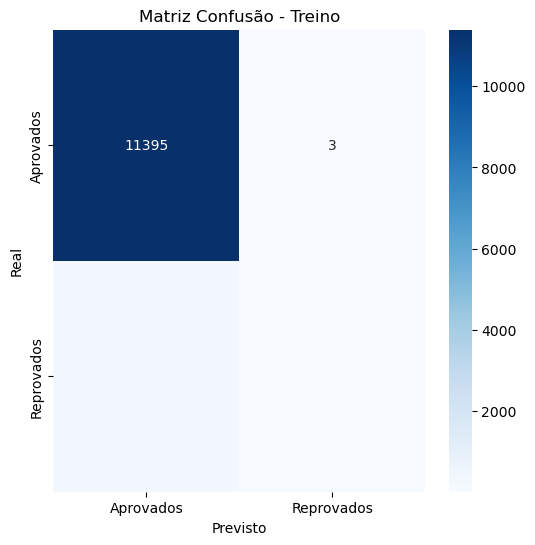

In [99]:
# 2.7 - Avaliando o desempenho do modelo nos dados de treinamento usando uma matriz de confusão
y_pred_train = tree_model.predict(X_train)
cm = confusion_matrix(y_train, y_pred_train)

# Visualizando a matriz de confusão em um gráfico de heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Aprovados', 'Reprovados'], yticklabels=['Aprovados', 'Reprovados'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz Confusão - Treino')
plt.show()

In [100]:
# 2.8 - Calculando e exibindo a acurácia do modelo nos dados de treinamento
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Acurácia:", accuracy_train)

Acurácia: 0.978978978978979


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [101]:
# 1 - Realizando previsões nos dados de validação usando o modelo de árvore de decisão treinado
y_pred_test = tree_model.predict(X_val)

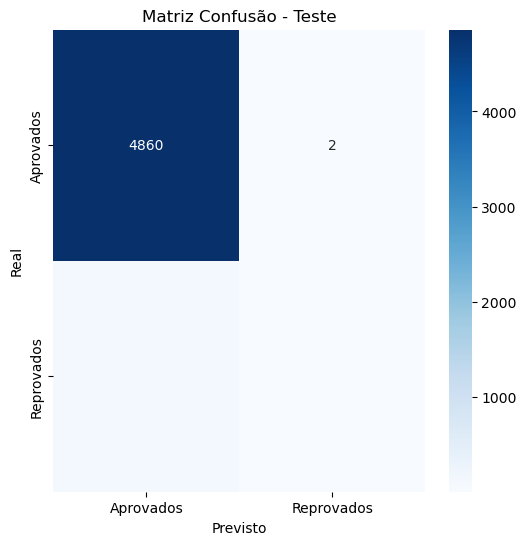

In [102]:
# 2 - Avaliando o desempenho do modelo nos dados de teste usando uma matriz de confusão
cm_test = confusion_matrix(y_val, y_pred_test)

# Visualizando a matriz de confusão em um gráfico de heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=['Aprovados', 'Reprovados'], yticklabels=['Aprovados', 'Reprovados'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz Confusão - Teste')
plt.show()

In [103]:
# 3 - Calculando e exibindo as acurácias do modelo nos dados de teste e treinamento
accuracy_test = accuracy_score(y_val, y_pred_test)
accuracy_train = accuracy_score(y_train, tree_model.predict(X_train))
print("Acurácia teste:", accuracy_test)
print("Acurácia treinamento:", accuracy_train)

Acurácia teste: 0.9731731731731732
Acurácia treinamento: 0.978978978978979


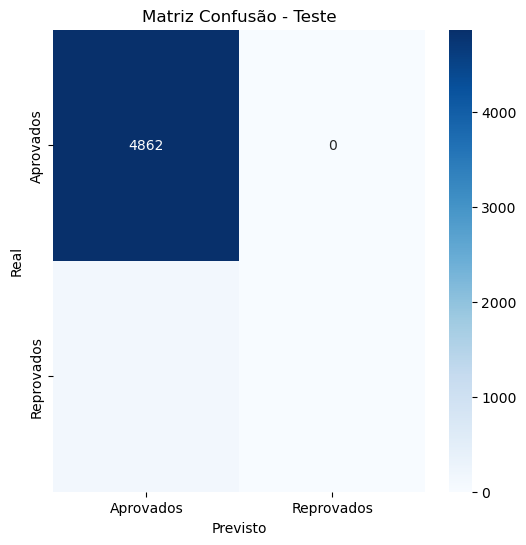

Proporção de proponentes classificados como 'maus': 0.0


In [104]:
# 4 - Criando e treinando um novo modelo de árvore de decisão com parâmetros específicos
tree_model_new = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
tree_model_new.fit(X_train, y_train)

# Realizando previsões nos dados de validação usando o novo modelo
y_pred_test_new = tree_model_new.predict(X_val)

# Avaliando o desempenho do novo modelo com uma matriz de confusão
cm_test_new = confusion_matrix(y_val, y_pred_test_new)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_test_new, annot=True, fmt="d", cmap="Blues", xticklabels=['Aprovados', 'Reprovados'], yticklabels=['Aprovados', 'Reprovados'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz Confusão - Teste')
plt.show()

# Calculando a proporção de proponentes classificados como 'maus' pelo novo modelo
proportion_maus = np.mean(y_pred_test_new == 1)
print("Proporção de proponentes classificados como 'maus':", proportion_maus)

In [105]:
# 5 - Calculando a acurácia se todos os contratos fossem classificados como 'bons'
accuracy_all_goods = np.mean(y_val == 0)
print("Acurácia se todos os contratos fossem classificados como 'bons':", accuracy_all_goods)

Acurácia se todos os contratos fossem classificados como 'bons': 0.9733733733733734
